In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_ds = pd.read_csv("C:/Users/25479/OneDrive/Desktop/Github/Datasets-EDA/Titanic/train.csv")
test_ds = pd.read_csv("C:/Users/25479/OneDrive/Desktop/Github/Datasets-EDA/Titanic/test.csv")

EXPLORING THE TRAIN DATASET

In [4]:
#Shape of the dataset
train_ds.shape

(891, 12)

In [5]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*There are missing values in the columns "Age", "Cabin" and "Embarked".


In [7]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#descriptive statistics of the object data types columns
train_ds.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


*There are duplicates in the columns 'Ticket' and 'Cabin'. Highest number of duplicated ticket number is "347082", 7 times. For the cabin, it is 'B96 B98' with 4  people sharing it.
*There are 577 Males and the rest are Female
*644 people embarked from port "S"

EXPLORING THE TESTING DATASET

In [9]:
test_ds.shape

(418, 11)

In [10]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


*Missing values in the 'Age', 'Fare'  and 'Cabin' columns.

EXPLORING RELATIONSHIP BETWEEN FEATURES AND SURVIVAL

In [12]:
survived = train_ds[train_ds['Survived'] == 1]
percent_1 = float(len(survived))/ len(train_ds)*100.0
not_survived = train_ds[train_ds['Survived'] == 0]
percent_2 = float(len(not_survived))/len(train_ds)*100.0

print("Survived: %i (%.1f%%)"%(len(survived), percent_1))
print("Not Survived: %i (%.1f%%)"%(len(not_survived), percent_2))
print("Total Passengers: %i"%len(train_ds))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total Passengers: 891


In [13]:
train_ds['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
pclass_survival =train_ds.groupby('Pclass').Survived.value_counts()
pclass_survival

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Survived'>

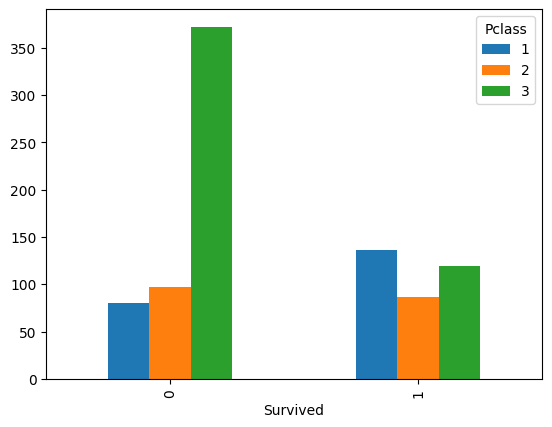

In [15]:
#plotting the pclass vs survived
pclass_survival.unstack(level=0).plot(kind='bar', subplots = False)

*Noted that higher class passengers have better survival chance

In [16]:
pclass_survived_average = train_ds[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: >

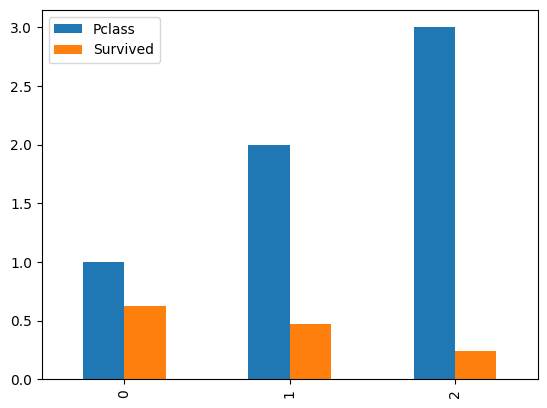

In [17]:
pclass_survived_average.plot(kind='bar', subplots=False)

<Axes: xlabel='Pclass', ylabel='Survived'>

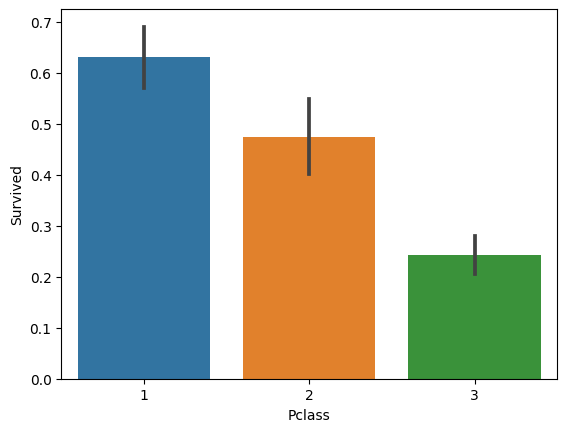

In [18]:
sns.barplot(x='Pclass', y = 'Survived', data=train_ds)

*High class passengers have better average survival than the low class passengers

In [19]:
train_ds['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
sex_survival = train_ds.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='Survived'>

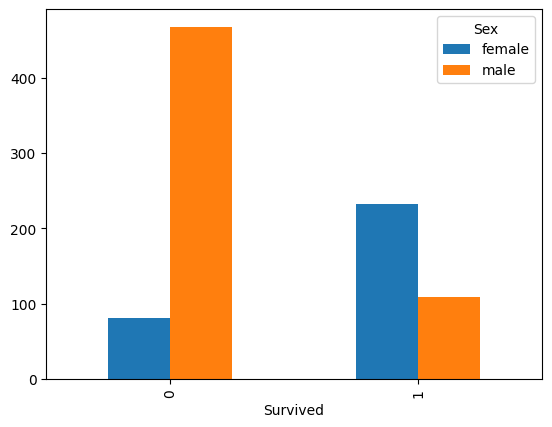

In [21]:
sex_survival.unstack(level=0).plot(kind='bar', subplots= False)

In [22]:
sex_survived_average = train_ds[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()
sex_survived_average

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: >

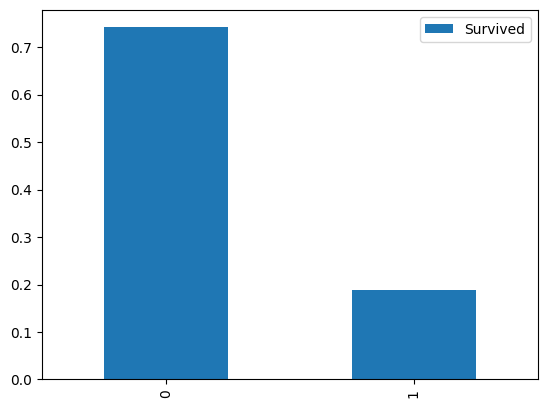

In [23]:
sex_survived_average.plot(kind='bar', subplots=False)

<Axes: xlabel='Sex', ylabel='Survived'>

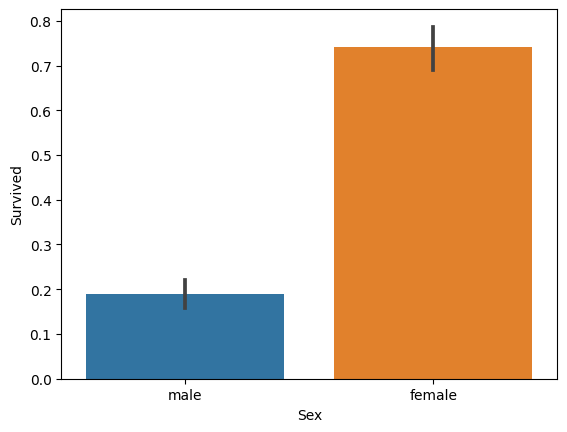

In [24]:
sns.barplot(x='Sex', y='Survived', data = train_ds)

*Females have a better survival chance

Pclass and Sex vs survival

In [26]:
tab = pd.crosstab(train_ds['Pclass'], train_ds['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0, 0.5, 'Percentage')

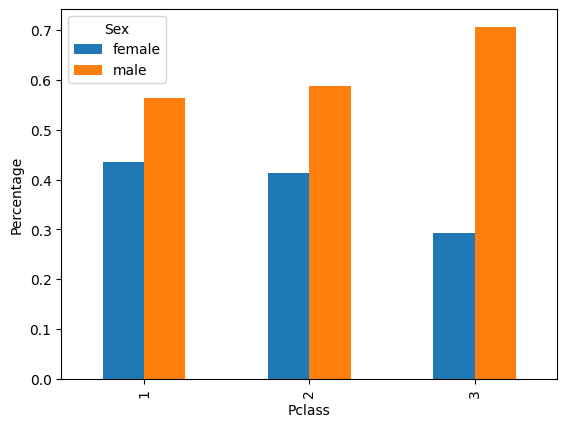

In [27]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

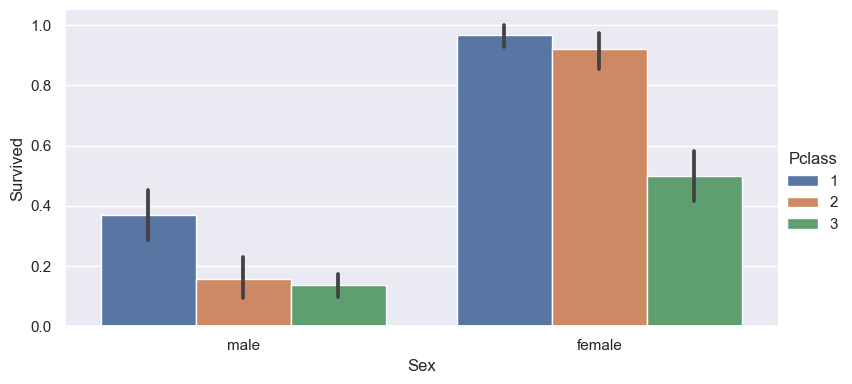

In [39]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', height=4, aspect=2, kind='bar', data=train_ds)

*Women from 1st and 2nd Pclass have almost 100% survival chance. Men from 2nd and 3rd Pclass have only around 10% survival chance

Pclass, Sex and Embarked vs Survival

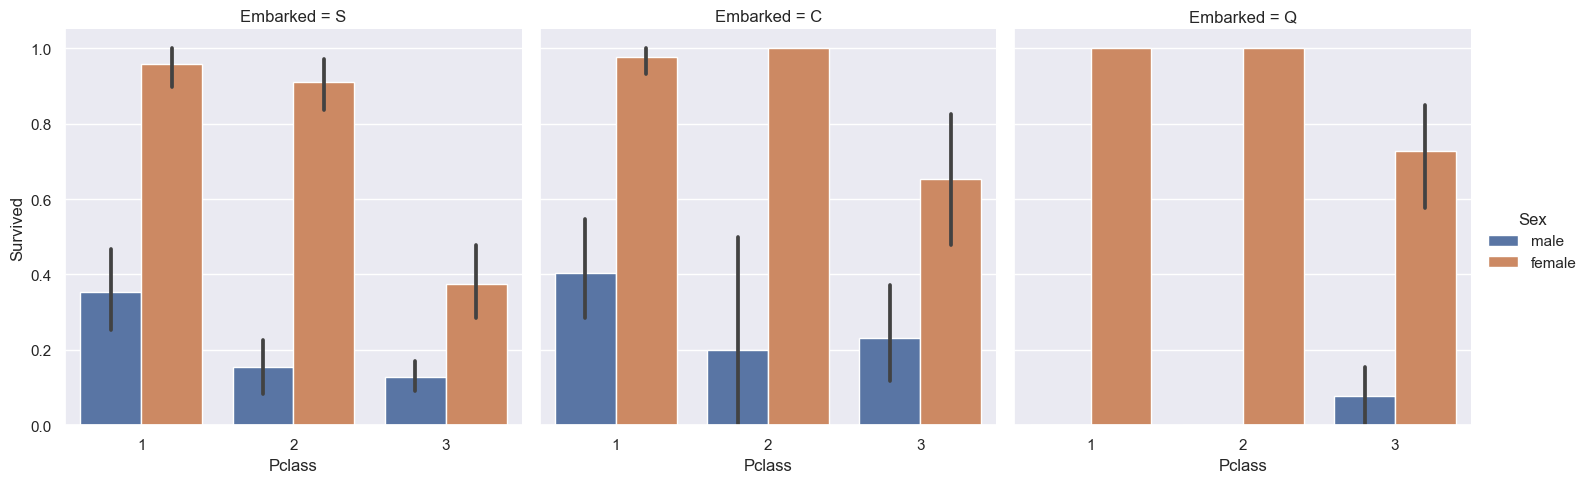

In [42]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='bar', data=train_ds)

Embarked vs Survived

In [44]:
train_ds['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [45]:
train_ds.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [47]:
train_ds[['Embarked', 'Survived']].groupby(['Embarked'], as_index =False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

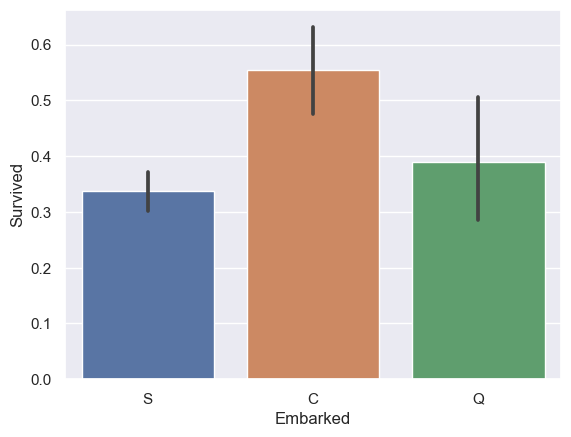

In [52]:
sns.barplot(x='Embarked', y='Survived', data = train_ds)

Parch vs Survival
Parch - Number of parents of children travelling with each passenger

In [54]:
train_ds.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [56]:
train_ds.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [57]:
train_ds[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

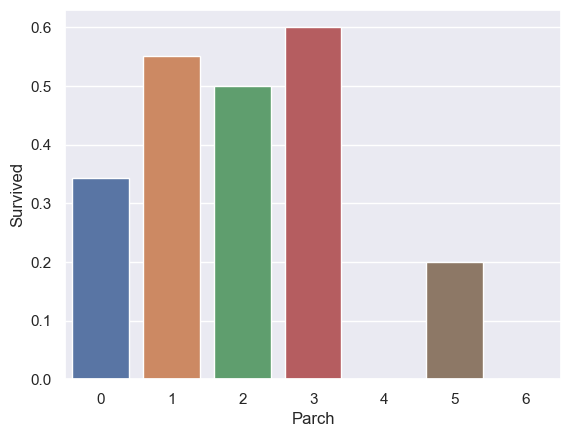

In [60]:
sns.barplot(x='Parch', y='Survived', ci=None, data = train_ds)

SibSp vs. Survival
SibSp: Number of siblings or spouses travelling with each passenger

In [62]:
train_ds['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [64]:
train_ds.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [66]:
train_ds[['SibSp', 'Survived']].groupby(['SibSp'], as_index= False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

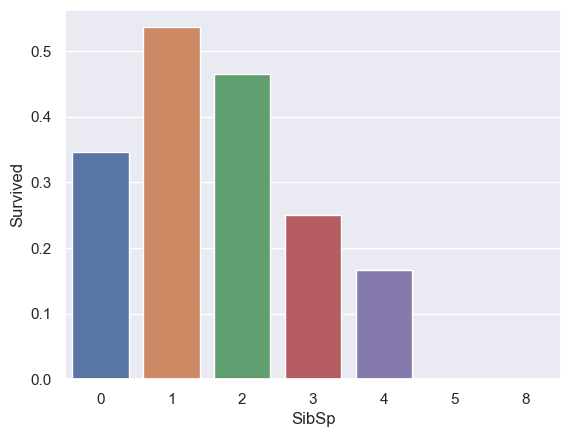

In [67]:
sns.barplot(x='SibSp', y='Survived', ci=None, data= train_ds)